<a href="https://colab.research.google.com/github/nf-mach-1/HonoursProject/blob/main/HonoursProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#first open the google drive so that I can be able to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing all necessary packages and libraries**

In [ ]:
#In this section we will import all the algorithms that will be evaluated in this model
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import io


#Algorithms
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, f1_score, log_loss
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from scipy import interp

**Reading the Dataset and Preprocessing**

In [ ]:
datasets = pd.read_excel('/content/drive/MyDrive/data/dataset.xlsx')
datasets = datasets.drop(columns=['Ontology','Ontology Name'])
datasets.isna().sum()
datasets = datasets.dropna()

dataset = pd.DataFrame(datasets, columns=['noc','er','a/cr','irr','c/rr','anp','acr','ar', 'ir', 'rr', 'ap', 'cr', 'arc', 'alc', 'ad', 'md', 'ab', 'mb'])

def criterions(dataset):
  df = dataset.copy()
  km = KMeans(n_clusters=4,random_state=1, algorithm='full')
  y_pred = km.fit(df[['ar', 'ir', 'rr', 'ap', 'cr', 'arc', 'alc', 'ad', 'md', 'ab', 'mb']])
  df['criteria'] = y_pred.labels_
  print(y_pred.labels_)
  return df


dataset = criterions(dataset)

[0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 2 0 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 3 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 1 2 2 0 0 0 0 0 0 2 0 0 1
 2 0 1 0 2 2 1 0 2 2 0 2 0 0 0 2 2 0 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 3 0
 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0]


**Algorithms to be used in this model**

In [ ]:
names = ["k-Nearest Neighbor","Decision Tree","Naive Bayes","Support Vector Machine","Random Forest Classifier","Linear Regression","Logistic Regression"]

classifiers = [
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    LinearRegression(),
    LogisticRegression(solver='liblinear',random_state=0)]



**Get the input and the output values for classification**

**Building the model, train and test it**

**Get the accuracy values for each model and display the classification report**

In [ ]:
xdata = dataset.drop(columns=['criteria'])
ydata = dataset['criteria']
xtrain,xtest,ytrain,ytest = train_test_split(xdata,ydata,test_size=0.3)
print(xtest.shape)

(60, 18)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report for  k-Nearest Neighbor
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       1.00      0.50      0.67         4
           2       0.69      1.00      0.81        11
           3       0.00      0.00      0.00         1

    accuracy                           0.92        60
   macro avg       0.67      0.61      0.61        60
weighted avg       0.93      0.92      0.91        60


The classification report for  Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      0.75      0.86         4
           2       1.00      0.91      0.95        11
           3       0.33      1.00      0.50         1

    accuracy                           0.97        60
   macro avg       0.83      0.91      0.83        60
weighted avg       0.99      0.97      0.97        60


The classification report for  Na

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report for  Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      1.00      1.00         4
           2       0.91      0.91      0.91        11
           3       0.00      0.00      0.00         1

    accuracy                           0.97        60
   macro avg       0.72      0.73      0.72        60
weighted avg       0.95      0.97      0.96        60


                  Algorithm  Accuracy
3    Support Vector Machine  1.000000
1             Decision Tree  0.966667
6       Logistic Regression  0.966667
0        k-Nearest Neighbor  0.916667
4  Random Forest Classifier  0.883333
2               Naive Bayes  0.816667
5         Linear Regression  0.750000


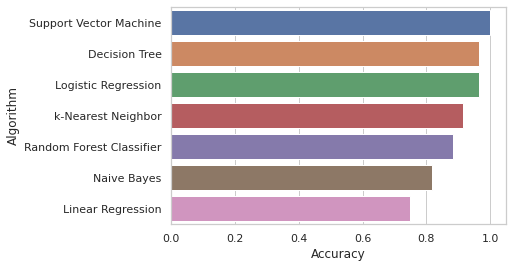

In [ ]:
acc_score = []
con_score = []

for name, clf in zip(names, classifiers):
    clf.fit(xtrain, ytrain) 
    ascore = clf.predict(xtest) 
    acc_predicts = accuracy_score(ytest,ascore) 
    con_predicts = confusion_matrix(ytest,ascore)
    c_report = classification_report(ytest, ascore)
    print("The classification report for ",name)
    print(c_report)
    print()
    acc_score.append(acc_predicts)
    con_score.append(con_predicts)


df = pd.DataFrame()

df['Algorithm'] = names
df['Accuracy'] = acc_score



df = df.sort_values(by=['Accuracy'],ascending=False)
print(df) 
cm = sns.light_palette("red",as_cmap=True)
s = df.style.background_gradient(cmap = cm)

sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Accuracy",data=df)



**Implementation of Confusion Matrix for each algorithm**

Confusion Matrix for  k-Nearest Neighbor


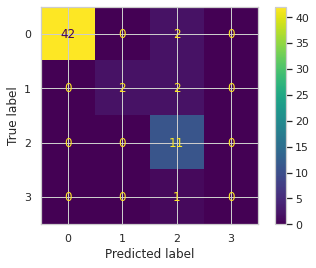


Confusion Matrix for  Decision Tree


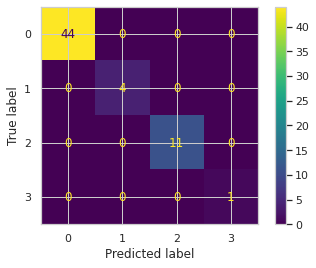


Confusion Matrix for  Naive Bayes


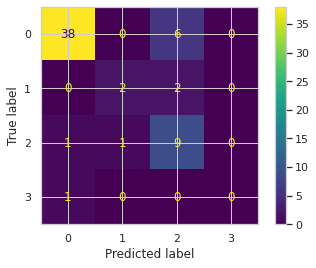


Confusion Matrix for  Support Vector Machine


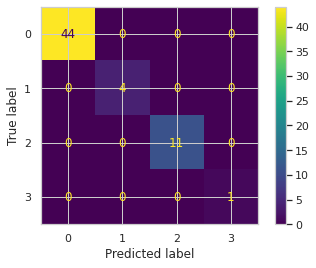


Confusion Matrix for  Random Forest Classifier


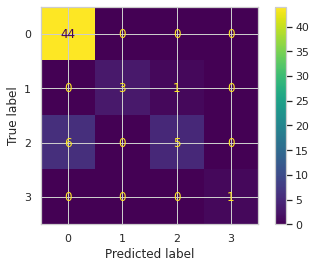


Confusion Matrix for  Linear Regression


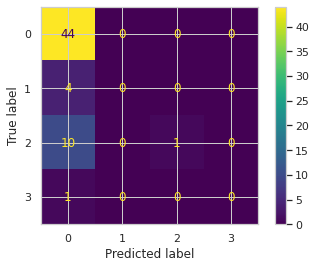


Confusion Matrix for  Logistic Regression


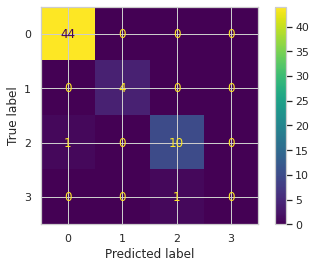

In [ ]:
def conf_Matrix(names, classifiers):
  yscore = 0
  for name, models in zip(names, classifiers):
    yscore = models.fit(xtrain, ytrain) 
    mdscore = clf.predict(xtest) 
    print("Confusion Matrix for ",name)
    plot_confusion_matrix(models, xtest, ytest)
    plt.show()
    print()

conf_Matrix(names, classifiers)

**Implement of the ROC Curve to compare the algorithms**



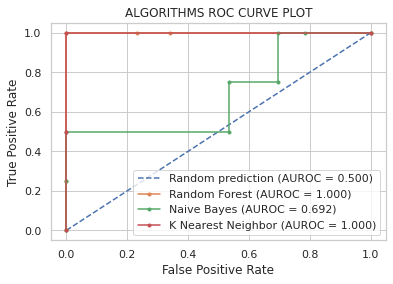

In [ ]:
def rf_nb_roc(xtrain, xtest, ytrain, ytest):
  rf = RandomForestClassifier(max_depth=5, n_estimators=100)
  rf.fit(xtrain, ytrain)
  nb = GaussianNB()
  nb.fit(xtrain, ytrain)
  knn = KNeighborsClassifier(5)
  knn.fit(xtrain, ytrain)

  r_probs = [0 for _ in range(len(ytest))]
  rf_probs = rf.predict_proba(xtest)
  nb_probs = nb.predict_proba(xtest)
  knn_probs = knn.predict_proba(xtest)

  rf_probs = rf_probs[:, 1]
  nb_probs = nb_probs[:, 1]
  knn_probs = knn_probs[:, 1]

  r_fpr, r_tpr, _ = roc_curve(ytest, r_probs, pos_label=True)
  r_auc = auc(r_fpr, r_tpr)
  rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs, pos_label=True)
  rf_auc = auc(rf_fpr, rf_tpr)
  nb_fpr, nb_tpr, _ = roc_curve(ytest, nb_probs, pos_label=True)
  nb_auc = auc(nb_fpr, nb_tpr)
  knn_fpr, knn_tpr, _ = roc_curve(ytest, knn_probs, pos_label=True)
  knn_auc = auc(knn_fpr, knn_tpr)

  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
  plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
  plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
  plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbor (AUROC = %0.3f)' % knn_auc)

  plt.title('ALGORITHMS ROC CURVE PLOT')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

rf_nb_roc(xtrain, xtest, ytrain, ytest)

In [ ]:
def knn_roc_curve(xtrain, xtest, ytrain, ytest):
  return 0

knn_roc_curve(xtrain, xtest, ytrain, ytest)

In [ ]:
''''def knn_roc_curve(name, classifier):
  return 0

knn_roc_curve(names.pop(0), classifiers.pop(0))

def dc_roc_curve(name, classifier):
  return 0

dc_roc_curve(names.pop(1), classifiers.pop(1))

def nb_roc_curve(name, classifier):
  return 0

nb_roc_curve(names.pop(2), classifiers.pop(2))'''



'''def rfc_roc_curve(name, classifier):
  return 0

rfc_roc_curve(names.pop(4), classifiers.pop(6))

def linr_roc_curve(name, classifier):
  return 0

linr_roc_curve(names.pop(5), classifiers.pop(7))

def logr_roc_curve(name, classifier):
  return 0

logr_roc_curve(names.pop(6), classifiers.pop(8))'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


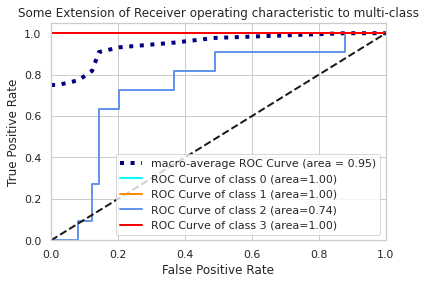

In [ ]:
xdata = dataset.drop(columns=['criteria'])
ydata = dataset['criteria']

y = label_binarize(ydata, classes=[0,1,2,3])

n_classes = 4
random_state = np.random.RandomState(0)
n_samples, n_features = xdata.shape
xdata = np.c_[xdata, random_state.randn(n_samples, 18*n_features)]
xtrain,xtest,ytrain,ytest = train_test_split(xdata, y, test_size=0.3, random_state=0)
def svm_roc_curve(xtrain, xtest, ytrain, ytest):
  model = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
  yscore = model.fit(xtrain, ytrain).decision_function(xtest)
  
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], yscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])


  mean_tpr /= n_classes
  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  plt.figure()
  lw = 2
  plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC Curve (area = {0:0.2f})' ''.format(roc_auc["macro"]), color='navy', linestyle=':',linewidth=4 )
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC Curve of class {0} (area={1:0.2f})' ''.format(i, roc_auc[i]))


  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title("Some Extension of Receiver operating characteristic to multi-class")
  plt.legend(loc="lower right")
  plt.show()


svm_roc_curve(xtrain, xtest, ytrain, ytest)